# Mental Health in the Technology Sector

<div style="width: 90%; margin: auto; padding: 20px; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">

<p style="text-align: center;">Roughly <strong>20%</strong> of adults are coping with mental illnesses such as <strong>depression</strong>, <strong>anxiety</strong>, <strong>bipolar disorder</strong>, or <strong>ADHD.</strong> In the tech industry, characterized by a high-stress work environment, long hours, constant availability expectations, and a blending of professional and personal life due to open-source commitments, it's crucial to ensure that individuals most vulnerable to mental health challenges receive support and aren't left behind. This can be achieved through proactive mental health initiatives, destigmatizing mental health conversations, promoting work-life balance, and offering resources and assistance to tech professionals facing these challenges.
</p>
</div>

![](https://i.postimg.cc/Kj48Mw6y/mental-health.png)

<div style="width: 90%; margin: auto; padding: 20px; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">

Mental health has become a prominent issue in recent years, as it impacts not just individuals, but also companies and society as a whole.
</div>

<p style="text-align: center; font-size: 30px; color: green; font-weight: bold;"> Objective</p>
This notebook aims to illuminate the state of mental health in the industry from <strong>2014 to 2023</strong> and provide solutions for a healthier and more sustainable future.
<br><br>
The data presented here is sourced from surveys conducted by <strong>Open Source Mental Illness (OSMI) between 2014 and 2023.</strong> These surveys were designed to evaluate people's perceptions of mental health and the prevalence of mental health disorders within the technology industry.
</div>

## Problem Statement
    To investigate how demographic, work-related, social, and organizational factors can be related to mental health problems. Given this, the goal is to develop a predictive model that indicates whether a person might need medical help.

## Relevance Justification
    Studies indicate that mental health directly impacts an individual's work performance (Paul, M., & Das, S. (2023)). Additionally, an organization called Open Sourcing Mental Health (OSMI) published a database with hundreds of records obtained from surveys of technology sector workers. In this survey, people reported characteristics of the company where they work. For example, information about company benefits, gender, number of reported employees, and whether the person has previously sought medical help was reported.

    This database, in addition to the relevance of mental health at work, develops the main motivation that promotes the development of this research.

## Proposed Solution
    The study will be approached from the perspective of a classification problem where it will be inferred whether an individual, through information obtained from the survey, requires medical help or not.
    Preliminarily, in a limited observation of the data, it was observed that the variable to predict will be "treatment" since this variable describes whether a person has previously sought medical help. On the other hand, given the subjective characteristics of this self-reported variable (since a person with mental problems may not be aware of their illness), the observation is made that this study is only an approach to the studied phenomenon without the purpose of demonstrating its causality.


## References
Paul, M., & Das, S. (2023). Mental health in tech workplace: An analysis. International Journal of Science and Research Archive, 10(1), 221-233.

 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.io as pio

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV


from sklearn.ensemble import (
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
    HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score


from scipy.stats import shapiro

pd.set_option("display.max_columns", None)


pio.templates.default = "none"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_auc_score)

from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')



## Data Collection

I collected individual survey data files from OSMI for the years 2014 through 2023. These surveys contain responses from tech workers around the world regarding mental health history, treatment, and workplace support.


In [3]:
df_2014 = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
df_2016 = pd.read_csv('/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv')
df_2017 = pd.read_csv('/kaggle/input/osmi-mental-health-in-tech-survey-2017/OSMI Mental Health in Tech Survey 2017.csv')
df_2018 = pd.read_csv('/kaggle/input/osmi-mental-health-in-tech-survey-2018/OSMI Mental Health in Tech Survey 2018.csv')
df_2019 = pd.read_csv('/kaggle/input/osmi-mental-health-in-tech-survey-2019/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')
df_2020 = pd.read_csv('/kaggle/input/osmi-2020-mental-health-in-tech-survey-results/OSMI 2020 Mental Health in Tech Survey Results .csv')
df_2021 = pd.read_csv('/kaggle/input/osmh-2021-mental-health-in-tech-survey-results/OSMI 2021 Mental Health in Tech Survey Results .csv')
df_2022 = pd.read_csv('/kaggle/input/osmh-mental-health-in-tech-survey-2022/responses.csv')
df_2023 = pd.read_csv('/kaggle/input/osmi-mental-health-in-tech-survey-2023/responses.csv')


<h3 style="color:#800813">Understanding the Columns:</h3>

| Column Name               | Question                                                                                   |
|--------------------------|--------------------------------------------------------------------------------------------|
| Timestamp                | Timestamp                                                                                 |
| Age                      | Age                                                                                        |
| Gender                   | Gender                                                                                     |
| Country                  | Country                                                                                    |
| state                    | If you live in the United States, which state or territory do you live in?                |
| self_employed            | Are you self-employed?                                                                     |
| family_history           | Do you have a family history of mental illness?                                            |
| treatment                | Have you sought treatment for a mental health condition?                                   |
| work_interfere           | If you have a mental health condition, do you feel that it interferes with your work?      |
| no_employees             | How many employees does your company or organization have?                                 |
| remote_work              | Do you work remotely (outside of an office) at least 50% of the time?                      |
| tech_company             | Is your employer primarily a tech company/organization?                                    |
| benefits                 | Does your employer provide mental health benefits?                                         |
| care_options             | Do you know the options for mental health care your employer provides?                     |
| wellness_program         | Has your employer ever discussed mental health as part of an employee wellness program?    |
| seek_help                | Does your employer provide resources to learn more about mental health issues and how to seek help? |
| anonymity                | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? |
| leave                    | How easy is it for you to take medical leave for a mental health condition?                |
| mental_health_consequence| Do you think that discussing a mental health issue with your employer would have negative consequences? |
| phys_health_consequence  | Do you think that discussing a physical health issue with your employer would have negative consequences? |
| coworkers                | Would you be willing to discuss a mental health issue with your coworkers?                 |
| supervisor               | Would you be willing to discuss a mental health issue with your direct supervisor(s)?      |
| mental_health_interview  | Would you bring up a mental health issue with a potential employer in an interview?        |
| phys_health_interview    | Would you bring up a physical health issue with a potential employer in an interview?      |
| mental_vs_physical       | Do you feel that your employer takes mental health as seriously as physical health?        |
| obs_consequence          | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |
| comments                 | Any additional notes or comments                                                           |


In [4]:
df_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [6]:
df_2017.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address yo

In [7]:
df_2018.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address yo

In [8]:
df_2019.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with yo

In [9]:
df_2020.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [10]:
df_2021.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [11]:
df_2022.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [12]:
df_2023.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [13]:
print(df_2014.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)
print(df_2023.shape)

(1259, 27)
(1433, 63)
(756, 123)
(417, 123)
(352, 82)
(180, 120)
(131, 124)
(164, 126)
(6, 126)


In [14]:
df_2023.sample(6)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [15]:
print(df_2014.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)
print(df_2021.columns)
print(df_2022.columns)
print(df_2023.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental 

## Data Cleaning & Preprocessing

We merged the datasets from multiple years into a single dataframe and standardized column names. This step also included:
- Handling missing values
- Standardizing responses for key columns (e.g., gender, country)
- Removing invalid ages
- Creating consistent categorical features across years


In [16]:
column_mapping = {
    # -------- 2014 --------
    'Age': 'age',
    'Gender': 'gender',
    'Country': 'country',
    'self_employed': 'self_employed',
    'family_history': 'family_history',
    'treatment': 'treatment',
    'work_interfere': 'work_interfere',
    'no_employees': 'no_employees',
    'tech_company': 'tech_company',
    'benefits': 'benefits',
    'care_options': 'care_options',
    'wellness_program': 'wellness_program',
    'seek_help': 'seek_help',
    'anonymity': 'anonymity',
    'leave': 'leave',
    
    # -------- 2016 --------
    'Do you work remotely?':'remote_work',
    'What US state or territory do you live in?':'state',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'country',
    'Are you self-employed?': 'self_employed',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treatment',
    'How many employees does your company or organization have?': 'no_employees',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'care_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_program',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'leave',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interfere',

    # -------- 2017+ --------
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'What US state or territory do you <strong>live</strong> in?':'state',
    '<strong>Are you self-employed?</strong>': 'self_employed',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'anonymity',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'treatment',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'care_options',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'seek_help',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'leave',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'work_interfere',

    # -------- 2018+ --------
    'What country do you <strong>work</strong> in?': 'country',

    # -------- 2019 - 2023 variations --------
    'What US state or territory do you *live* in?':'state',
    'What country do you *live* in?':'country',
    '*Are you self-employed?*': 'self_employed',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you ever been diagnosed with a mental health condition by a medical professional?': 'treatment',
    'How many people are employed at your company?': 'no_employees',
    'Is your company primarily a tech company?': 'tech_company',
    'Does your employer provide mental health benefits?': 'benefits',
    'Are you aware of the mental health options your employer provides?': 'care_options',
    'Does your employer discuss mental health in the workplace?': 'wellness_program',
    'Does your employer offer mental health resources?': 'seek_help',
    'Is your anonymity protected when using mental health resources?': 'anonymity',
    'How easy is it to take medical leave for mental health?': 'leave',
    'How does your mental health interfere with your work?': 'work_interfere',
    'Would you be willing to discuss a mental health issue with your coworkers?':'coworkers',
    'how much importance does your employer place on mental health?':'mental_health_consequence',
    'how much importance does your employer place on physical health?':'phys_health_consequence',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor?':'supervisor',
    'Would you bring up your mental health with a potential employer in an interview?':'mental_health_interview',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?':'mental_vs_physical'
}

In [17]:
def clean_and_standardize(df, year, mapping, target_columns):
    df = df.rename(columns={k: v for k, v in mapping.items() if k in df.columns})
    df['survey_year'] = year
    available_cols = [col for col in target_columns if col in df.columns]
    return df[available_cols + ['survey_year']]

In [18]:
target_columns = [    
    'age', 'gender', 'country', 'state', 'self_employed', 'family_history',
     'treatment', 'work_interfere', 'no_employees', 'remote_work','tech_company', 'benefits', 'care_options', 'wellness_program',
     'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
     'phys_health_consequence', 'coworkers', 'supervisor',
     'mental_vs_physical', 'obs_consequence', 'comments'
]

In [19]:
df_2014_cleaned = clean_and_standardize(df_2014, 2014, column_mapping, target_columns)
df_2016_cleaned = clean_and_standardize(df_2016, 2016, column_mapping, target_columns)
df_2017_cleaned = clean_and_standardize(df_2017, 2017, column_mapping, target_columns)
df_2018_cleaned = clean_and_standardize(df_2018, 2018, column_mapping, target_columns)
df_2019_cleaned = clean_and_standardize(df_2019, 2019, column_mapping, target_columns)
df_2020_cleaned = clean_and_standardize(df_2020, 2020, column_mapping, target_columns)
df_2021_cleaned = clean_and_standardize(df_2021, 2021, column_mapping, target_columns)
df_2022_cleaned = clean_and_standardize(df_2022, 2022, column_mapping, target_columns)
df_2023_cleaned = clean_and_standardize(df_2023, 2023, column_mapping, target_columns)

In [20]:
df_2014_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,Yes,No,NaN,2014
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No,NaN,2014
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,No,No,NaN,2014
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,No,Yes,NaN,2014
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Don't know,No,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,Don't know,No,NaN,2014
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,Yes,No,NaN,2014
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,NaN,2014
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,NaN,2014


In [21]:
df_2016_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,survey_year
0,39,Male,United Kingdom,NaN,0,No,0,Not applicable to me,26-100,Sometimes,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,2016
1,29,male,United States of America,Illinois,0,Yes,1,Sometimes,6-25,Never,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,2016
2,38,Male,United Kingdom,NaN,0,No,1,Not applicable to me,6-25,Always,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,2016
3,43,male,United Kingdom,NaN,1,No,1,Sometimes,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,43,Female,United States of America,Illinois,0,Yes,1,Sometimes,6-25,Sometimes,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,34,Female,United States of America,New York,1,Yes,1,Not applicable to me,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1429,56,MALE,United States of America,California,1,Yes,0,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1430,52,Male,United States of America,Georgia,0,Yes,1,Sometimes,100-500,Sometimes,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,2016
1431,30,Female,United States of America,Nebraska,0,Yes,0,Often,100-500,Sometimes,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,2016


In [22]:
df_2017_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,27.0,Female,United Kingdom,NaN,0,No,1,Yes,100-500,1.0,Yes,No,I don't know,I don't know,I don't know,Same level of comfort for each,2017
1,31.0,male,United Kingdom,NaN,0,No,0,Maybe,100-500,1.0,Yes,No,No,I don't know,I don't know,Same level of comfort for each,2017
2,36.0,male,United States of America,Missouri,0,Yes,1,Yes,6-25,1.0,No,I don't know,No,Yes,Difficult,Same level of comfort for each,2017
3,22.0,Male,United States of America,Washington,0,I don't know,1,Yes,More than 1000,1.0,Yes,I don't know,I don't know,Yes,Difficult,Same level of comfort for each,2017
4,52.0,female,United States of America,Illinois,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,41.0,Male,United Kingdom,NaN,0,No,1,Yes,26-100,1.0,No,No,I don't know,Yes,Very easy,Same level of comfort for each,2017
752,40.0,Male,United States of America,Texas,0,No,1,Yes,6-25,1.0,No,I don't know,No,Yes,Very easy,Same level of comfort for each,2017
753,NaN,NaN,NaN,NaN,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
754,30.0,dude,United States of America,Tennessee,0,No,0,Yes,26-100,1.0,Yes,No,No,No,Very easy,Physical health,2017


In [23]:
df_2018_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,57,Female,Canada,NaN,0,Yes,1,No,More than 1000,1.0,Yes,Yes,Yes,Yes,Yes,Somewhat difficult,Physical health,2018
1,29,male,United States of America,Massachusetts,0,Yes,1,No,More than 1000,1.0,Yes,Yes,No,I don't know,I don't know,Somewhat difficult,Physical health,2018
2,46,Male,United States of America,Florida,0,Yes,0,No,6-25,0.0,Yes,Yes,No,No,I don't know,Somewhat easy,Physical health,2018
3,34,male,Norway,NaN,0,No,0,No,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Physical health,2018
4,29,Ostensibly Male,United States of America,Tennessee,0,Yes,1,Yes,26-100,1.0,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Same level of comfort for each,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,28,Male,United States of America,Tennessee,0,Yes,1,Maybe,6-25,1.0,I don't know,No,No,No,I don't know,Very easy,Physical health,2018
413,39,Male,Finland,NaN,0,Yes,1,No,100-500,0.0,Yes,Yes,No,Yes,Yes,Difficult,Physical health,2018
414,31,Male,United States of America,New Jersey,0,I don't know,1,Maybe,100-500,0.0,Yes,Yes,I don't know,I don't know,I don't know,I don't know,Physical health,2018
415,27,Male,United States of America,Tennessee,0,I don't know,0,Yes,6-25,1.0,Yes,Yes,I don't know,Yes,I don't know,Somewhat easy,Same level of comfort for each,2018


In [24]:
df_2019_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,25,Male,United States of America,Nebraska,False,No,False,Yes,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,Physical health,2019
1,51,male,United States of America,Nebraska,False,Yes,False,Maybe,26-100,True,Yes,No,No,Yes,Yes,I don't know,Physical health,2019
2,27,Male,United States of America,Illinois,False,I don't know,False,No,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,Same level of comfort for each,2019
3,37,male,United States of America,Nebraska,False,Yes,False,Yes,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,Physical health,2019
4,46,m,United States of America,Nebraska,False,No,False,No,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,Physical health,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,27,male,India,NaN,False,No,False,No,More than 1000,False,I don't know,No,No,I don't know,I don't know,Somewhat difficult,Physical health,2019
348,48,m,United States of America,Louisiana,True,No,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
349,50,M,India,NaN,True,No,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
350,30,female,India,NaN,False,No,False,No,More than 1000,True,No,No,No,No,Yes,Difficult,Physical health,2019


In [25]:
df_2020_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,45,Male,United States of America,Connecticut,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,24,female,Russia,NaN,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,46,Male,India,NaN,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,25,Female,Canada,NaN,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,25,F,Canada,NaN,1,I don't know,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,53,Male,United States of America,New York,0,No,0,No,More than 1000,0.0,No,No,No,No,No,Somewhat difficult,Physical health,2020
176,23,F,Philippines,NaN,0,No,0,Maybe,26-100,1.0,Yes,Yes,Yes,Yes,I don't know,Very easy,Physical health,2020
177,34,Male,United States of America,Tennessee,0,Yes,1,Maybe,100-500,1.0,I don't know,No,No,I don't know,I don't know,Somewhat easy,Physical health,2020
178,43,Male,Canada,NaN,0,Yes,1,No,500-1000,0.0,Yes,No,Yes,Yes,Yes,Difficult,Physical health,2020


In [26]:
df_2021_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,28,Female,United States of America,Alaska,0,I don't know,0,Maybe,26-100,1.0,I don't know,No,No,I don't know,I don't know,Very easy,Physical health,2021
1,41,male,Brazil,NaN,0,No,0,No,500-1000,1.0,Yes,No,Yes,Yes,Yes,I don't know,Physical health,2021
2,35,Male,Brazil,NaN,0,No,0,Maybe,100-500,1.0,Yes,Yes,No,I don't know,I don't know,Somewhat easy,Same level of comfort for each,2021
3,20,male,Italy,NaN,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
4,35,female,Canada,NaN,0,No,1,No,More than 1000,0.0,Yes,No,Yes,Yes,I don't know,Difficult,Physical health,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,33,Male,Germany,NaN,0,I don't know,1,Yes,26-100,1.0,No,No,No,No,I don't know,Somewhat easy,Physical health,2021
127,49,Male,Portugal,NaN,0,Yes,0,Maybe,100-500,1.0,No,NaN,I don't know,No,I don't know,Somewhat easy,Physical health,2021
128,28,NaN,Pakistan,NaN,1,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
129,26,Male,India,NaN,1,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [27]:
df_2022_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,23,female,Russia,NaN,1,I don't know,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1,43,Male,Netherlands,NaN,0,Yes,1,Yes,26-100,1.0,I don't know,No,No,No,I don't know,Very easy,Physical health,2022
2,38,male,Sweden,NaN,0,Yes,1,Yes,26-100,1.0,No,Yes,I don't know,I don't know,Yes,Somewhat easy,Physical health,2022
3,35,Female,United States of America,Oregon,0,Yes,1,Maybe,More than 1000,1.0,Yes,Yes,Yes,Yes,I don't know,I don't know,Physical health,2022
4,33,Female,United Kingdom,NaN,0,Yes,1,Yes,26-100,1.0,Yes,No,Yes,Yes,Yes,Very easy,Same level of comfort for each,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,31,female,Poland,NaN,0,No,1,Maybe,More than 1000,1.0,I don't know,Yes,Yes,Yes,I don't know,Somewhat difficult,Physical health,2022
160,40,M,Australia,NaN,0,No,0,No,26-100,1.0,Yes,Yes,Yes,Yes,Yes,Very easy,Physical health,2022
161,23,NaN,United States of America,Alabama,0,Yes,1,Yes,26-100,1.0,I don't know,Yes,Yes,Yes,Yes,Very easy,Physical health,2022
162,21,Female,Kazakhstan,NaN,1,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [28]:
df_2023_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_vs_physical,survey_year
0,40,Female,United States of America,Colorado,0,I don't know,1,Maybe,26-100,1.0,No,No,No,No,Yes,Somewhat easy,Mental health,2023
1,36,Male,United States of America,Indiana,0,No,1,No,6-25,1.0,I don't know,No,No,I don't know,I don't know,I don't know,Physical health,2023
2,44,male,United States of America,Maryland,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,53,Female,United States of America,Indiana,0,Yes,1,Maybe,500-1000,0.0,Yes,Yes,Yes,No,I don't know,Neither easy nor difficult,Same level of comfort for each,2023
4,62,male,United States of America,Ohio,1,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
5,39,Male,Canada,NaN,0,Yes,1,No,More than 1000,1.0,I don't know,No,Yes,I don't know,Yes,Somewhat easy,Mental health,2023


In [29]:
print(df_2014_cleaned.shape)
print(df_2016_cleaned.shape)
print(df_2017_cleaned.shape)
print(df_2018_cleaned.shape)
print(df_2019_cleaned.shape)
print(df_2020_cleaned.shape)
print(df_2021_cleaned.shape)
print(df_2022_cleaned.shape)
print(df_2023_cleaned.shape)

(1259, 25)
(1433, 18)
(756, 17)
(417, 18)
(352, 18)
(180, 18)
(131, 18)
(164, 18)
(6, 18)


In [30]:
for i, df in zip([2014, 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023],
                 [df_2014_cleaned, df_2016_cleaned, df_2017_cleaned, df_2018_cleaned, df_2019_cleaned, df_2020_cleaned, df_2021_cleaned, df_2022_cleaned, df_2023_cleaned]):
    missing = set(target_columns) - set(df.columns)
    print(f"Year {i} missing columns: {missing}")

Year 2014 missing columns: set()
Year 2016 missing columns: {'mental_vs_physical', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2017 missing columns: {'benefits', 'remote_work', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2018 missing columns: {'remote_work', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2019 missing columns: {'remote_work', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2020 missing columns: {'remote_work', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2021 missing columns: {'remote_work', 'obs_consequence', 'phys_health_consequence', 'comments', 'mental_health_consequence', 'coworkers', 'supervisor'}
Year 2

In [31]:
merged_df_all_years = pd.concat([
    df_2014_cleaned,
    df_2016_cleaned,
    df_2017_cleaned,
    df_2018_cleaned,
    df_2019_cleaned,
    df_2020_cleaned,
    df_2021_cleaned,
    df_2022_cleaned,
    df_2023_cleaned
    ], ignore_index=True)


print("Final merged shape:", merged_df_all_years.shape)
merged_df_all_years.tail()

Final merged shape: (4698, 25)


,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
4693,36.0,Male,United States of America,Indiana,0,No,1,No,6-25,NaN,1.0,I don't know,No,No,I don't know,I don't know,I don't know,NaN,NaN,NaN,NaN,Physical health,NaN,NaN,2023
4694,44.0,male,United States of America,Maryland,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4695,53.0,Female,United States of America,Indiana,0,Yes,1,Maybe,500-1000,NaN,0.0,Yes,Yes,Yes,No,I don't know,Neither easy nor difficult,NaN,NaN,NaN,NaN,Same level of comfort for each,NaN,NaN,2023
4696,62.0,male,United States of America,Ohio,1,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4697,39.0,Male,Canada,NaN,0,Yes,1,No,More than 1000,NaN,1.0,I don't know,No,Yes,I don't know,Yes,Somewhat easy,NaN,NaN,NaN,NaN,Mental health,NaN,NaN,2023


In [32]:
round(merged_df_all_years.describe(include='all'),2)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
count,4.696000e+03,4664,4696,2779,4680.0,4698,4698.0,4133,4110,2692,4110.0,3467,3803,4110,4110,4110,4110,1259,1259,1259,1259,2964,1259,164,4698.00
unique,NaN,187,95,93,4.0,3,4.0,8,6,5,4.0,6,4,4,4,4,8,3,3,3,3,6,2,160,NaN
top,NaN,Male,United States of America,California,0.0,Yes,1.0,Sometimes,More than 1000,No,1.0,Yes,No,No,No,I don't know,Somewhat easy,No,No,Some of them,Yes,Physical health,No,* Small family business - YMMV.,NaN
freq,NaN,2052,2044,267,2851.0,2026,2004.0,828,1064,883,2115.0,1571,1671,2663,1905,1756,1004,490,925,774,516,1148,1075,5,NaN
mean,2.129475e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.54
std,1.459271e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.15
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.00
25%,2.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.00
50%,3.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.00
75%,3.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00


- Age for more than 1000000 years and negative age We definitely need to clean this mess.
- Gender - We need to clean gender column as it is having too many different categories.|

In [33]:
merged_df_all_years.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4698 entries, 0 to 4697
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4696 non-null   float64
 1   gender                     4664 non-null   object 
 2   country                    4696 non-null   object 
 3   state                      2779 non-null   object 
 4   self_employed              4680 non-null   object 
 5   family_history             4698 non-null   object 
 6   treatment                  4698 non-null   object 
 7   work_interfere             4133 non-null   object 
 8   no_employees               4110 non-null   object 
 9   remote_work                2692 non-null   object 
 10  tech_company               4110 non-null   object 
 11  benefits                   3467 non-null   object 
 12  care_options               3803 non-null   object 
 13  wellness_program           4110 non-null   objec

In [34]:
merged_df_all_years.dtypes

age                          float64
gender                        object
country                       object
state                         object
self_employed                 object
family_history                object
treatment                     object
work_interfere                object
no_employees                  object
remote_work                   object
tech_company                  object
benefits                      object
care_options                  object
wellness_program              object
seek_help                     object
anonymity                     object
leave                         object
mental_health_consequence     object
phys_health_consequence       object
coworkers                     object
supervisor                    object
mental_vs_physical            object
obs_consequence               object
comments                      object
survey_year                    int64
dtype: object

In [35]:
merged_df_all_years.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,comments,4534
1,coworkers,3439
2,supervisor,3439
3,phys_health_consequence,3439
4,obs_consequence,3439
5,mental_health_consequence,3439
6,remote_work,2006
7,state,1919
8,mental_vs_physical,1734
9,benefits,1231


In [36]:
x=round((merged_df_all_years.isna().sum()/merged_df_all_years.shape[0])*100,2)
x.reset_index()

,index,0
0,age,0.04
1,gender,0.72
2,country,0.04
3,state,40.85
4,self_employed,0.38
5,family_history,0.00
6,treatment,0.00
7,work_interfere,12.03
8,no_employees,12.52
9,remote_work,42.70


- Comments column has almost 96% null values. It can be understood as it is not a mandatory question to answer in survey.We can safely drop this column.
- For Work_interfere and self_employed , we need to consider treating these columns.
>>>
>>>
>>>
- Null values are observed. Most come from the State column which does not contribute to the research.
- In the same sense, the Timestamp and comments columns are discarded.

In [37]:
merged_df_all_years['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME', 'Illinois', 'Tennessee', 'Virginia', 'California',
       'Kentucky', 'Oregon', 'Pennsylvania', 'New Jersey', 'Georgia',
       'Washington', 'New York', 'Indiana', 'Minnesota', 'West Virginia',
       'Florida', 'Massachusetts', 'North Dakota', 'Texas', 'Maryland',
       'Wisconsin', 'Michigan', 'Vermont', 'North Carolina', 'Kansas',
       'District of Columbia', 'Nevada', 'Utah', 'Connecticut',
       'Colorado', 'Ohio', 'Iowa', 'South Dakota', 'Nebraska', 'Maine',
       'Missouri', 'Arizona', 'Oklahoma', 'Idaho', 'Rhode Island',
       'Alabama', 'Louisiana', 'South Carolina', 'New Hampshire',
       'New Mexico', 'Montana', 'Alaska', 'Delaware', 'Wyoming'],
      dtype=objec

- All the states are from US, so we can drop this column too.

In [38]:
df['country'].value_counts()

country
United States of America    5
Canada                      1
Name: count, dtype: int64

- More than 75% of people are from US. It is not that more people from US are suffering from mental health problems, the survey is taken up mostly by the us people. There are very few people who took part in survey from other countries.

In [39]:
merged_df_all_years = merged_df_all_years.drop(["comments",'coworkers','supervisor','supervisor','phys_health_consequence','obs_consequence','mental_health_consequence','remote_work','state','mental_vs_physical'], axis=1)

In [40]:
import pandas as pd

# Function to observe unique categorical values for each variable.
def ver_categorias_unicas(df):
    """
    Prints the unique categories of each categorical variable in the DataFrame.
    """
    for col in merged_df_all_years.select_dtypes(include=['object', 'category']).columns:
        print(f"--- {col} ---")
        print(merged_df_all_years[col].unique())
        print()
        print("------------------------------------------------------------------------------")

In [41]:
ver_categorias_unicas(merged_df_all_years)

--- gender ---
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'
 'I identify as female.' 'female ' 'Bigender' 'Female assigned at birth '
 'man' 'fm' 'Cis female ' 'Transitioned, M2F' 'Genderfluid (born female)'
 'Other/Transfeminine' 'Female or Multi-Gender Femme' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Sex is male'
 'none of your business' 'genderqueer' 'Human' 'Genderfluid'
 'genderqueer w

In [42]:
merged_df_all_years['gender'].value_counts().reset_index()

,gender,count
0,Male,2052
1,male,747
2,Female,572
3,female,319
4,M,276
...,...,...
182,fem,1
183,human,1
184,Female (props for making this a freeform field...,1
185,Female,1


In [43]:
male_keywords = ['mostly male', 'cisgender male','MAle', 'male/he/him','CIS Male','Cisgender male','Let\'s keep it simple and say "male"',
                 'Identify as male', 'Malel', 'dude', 'Ostensibly Male', 'male, born with xy chromosoms','Male, cis' ,'cis male ','Cis-male',
                 "male (hey this is the tech industry you're talking about)",'cis hetero male' ,'cis man' ,'MALE' ,'cis-male','mail', 'M|','male ' ,
                 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                 'Dude' ,'Male (cis)', 'Sex is male', 'Cis male', 'Male.', 'man', 'ostensibly male','Cis Man' ,'Malr', 'cis male', 'Mail', 
                 'Man','Make','Male (CIS)','Mal','Cis Male','Male','male', 'Male-ish', 'maile', 'm','M', 'man', 'cis male', 'cis man', 'male ',
                 'msle', 'malr', 'mal','maile', 'mail', 'make', 'guy', 'male leaning androgynous']

female_keywords = ['Femile' ,'FEMALE' ,'female, she/her','Female-identified' ,'cis woman','femmina','cisgender female' ,'Cisgendered woman',
                   'Female,cis-gendered','Female/gender non-binary.' ,'Cis woman', 'Female (cisgender)', 'Cis-Female','I identify as female' ,
                   '*shrug emoji* (F)', 'cis female' , 'F, cisgender' ,'Female-ish' ,'female (cisgender)' ,'Female (cis) ', 'Woman-identified',
                   'cis-Female','female (cis)','My sex is female.','femalw','Cis-woman' ,'Female (props for making this a freeform field, though)' ,
                   ' Female','fem','Cisgender Female','female/woman', 'fm' ,'Cis female ','I identify as female.','female ','Female assigned at birth ',
                   'femail', 'Female (cis)','Femake','Woman','Cis Female' ,'F','Female','female', 'f', 'woman', 'femake', 'femail', 'cis female',
                   'cis-female', 'female ', 'cis female/femme', 'female (cis)']

In [44]:
def clasificar_genero(valor):
   
    val_norm = str(valor).strip().lower()
    
    if any(kw in val_norm for kw in female_keywords):
        return 'Female'
    elif any(kw in val_norm for kw in male_keywords):
        return 'Male'
    else:
        return 'Other'


In [45]:
merged_df_all_years['gender'] = merged_df_all_years['gender'].apply(clasificar_genero)

In [46]:
merged_df_all_years['gender'].value_counts().reset_index()

,gender,count
0,Male,3375
1,Female,1225
2,Other,98


In [47]:
ver_categorias_unicas(merged_df_all_years)

--- gender ---
['Female' 'Male' 'Other']

------------------------------------------------------------------------------
--- country ---
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines'
 'United States of America' 'Lithuania' 'Venezuela' 'Argentina' 'Vietnam'
 'Slovakia' 'Bangladesh' 'Algeria' 'Pakistan' 'Afghanistan' 'Other'
 'Brunei' 'Iran' 'Ecuador' 'Chile' 'Guatemala' 'Taiwan' 'Serbia' 'Estonia'
 'Iceland' 'Indonesia' 'Jordan' 'Eritrea' 'Swaziland' 'Ukraine'
 'Luxembourg' 'Turkey' nan 'Mauritius' 'S

In [48]:
merged_df_all_years.dropna(subset="self_employed", inplace=True)
merged_df_all_years['work_interfere'] = merged_df_all_years['work_interfere'].fillna('Unknown')

- For the case of the self_employed variable, records with null values will be eliminated.
- - This is because adding a synthetic value to this variable could generate bias.
- However, for the work_interfere variable, it will be filled with the value "Unknown".
- - Since it could be generalized that users who did not respond is because they did not know.

In [49]:
merged_df_all_years['age'].value_counts().reset_index()

,age,count
0,30.0,275
1,32.0,245
2,29.0,241
3,31.0,234
4,28.0,232
...,...,...
66,8.0,1
67,-1726.0,1
68,329.0,1
69,-29.0,1


In [50]:
merged_df_all_years = merged_df_all_years[(merged_df_all_years['age'] >= 18) & (merged_df_all_years['age'] <= 80)]

In [51]:
merged_df_all_years['age'].value_counts().reset_index()

,age,count
0,30.0,275
1,32.0,245
2,29.0,241
3,31.0,234
4,28.0,232
5,34.0,224
6,33.0,217
7,35.0,216
8,27.0,212
9,26.0,207


- Outliers for the age variable are removed (negative ages and exaggeratedly high values).
- - It is decided not to opt for generating synthetic data calculated from an average since the outliers occur in only two observations.

## Feature Engineering
- Creating `support_score` based on support-related columns
- Binning age into age groups

In [52]:
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df_all_years['age_group'] = pd.cut(merged_df_all_years['age'], bins=bins, labels=labels, right=False)

In [53]:
merged_df_all_years['age_group'].value_counts().reset_index()

,age_group,count
0,25-34,2254
1,35-44,1417
2,18-24,465
3,45-54,403
4,55-64,107
5,65+,13


In [54]:
merged_df_all_years.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,benefits,1224
1,care_options,887
2,tech_company,581
3,leave,581
4,anonymity,581
5,seek_help,581
6,wellness_program,581
7,no_employees,581
8,survey_year,0
9,age,0


In [55]:
def clean_data(df):
 
    def clean_country(x):
        if pd.isna(x):
            return None
        x = str(x).strip().lower()
        if x in ['unknown', 'unk', 'n/a', 'na', '?', 'none']:
            return None
        return x.title()



    df['country'] = df['country'].apply(clean_country)
    df['no_employees'] = df['no_employees'].apply(clean_country)
    df['tech_company'] = df['tech_company'].apply(clean_country)
    df['seek_help'] = df['seek_help'].apply(clean_country)
    df['anonymity'] = df['anonymity'].apply(clean_country)

    df = df[df['country'].notna()]

    cat_cols = [
         'no_employees','tech_company', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity', 'leave'
    ]
    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown")


    

    df['self_employed_encoded'] = df['self_employed'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['tech_company_encoded'] = df['tech_company'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1,1.0] else 0)


    df['benefits'] = df['benefits'].astype(str).str.strip().str.lower()
    df['has_benefits'] = df['benefits'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['care_options'] = df['care_options'].astype(str).str.strip().str.lower()
    df['has_care_options'] = df['care_options'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['wellness_program'] = df['wellness_program'].astype(str).str.strip().str.lower()
    df['has_wellness_program'] = df['wellness_program'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['support_score'] = df['has_benefits'] + df['has_care_options'] + df['has_wellness_program']

    df['treatment'] = df['treatment'].astype(str).str.strip().str.lower()
    df['treatment_encoded'] = df['treatment'].apply(lambda x: 1 if x in ['Yes','yes', '1', 'true'] else 0)

    return df


In [56]:
cleaned_data = clean_data(merged_df_all_years)
cleaned_data

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,survey_year,age_group,self_employed_encoded,tech_company_encoded,has_benefits,has_care_options,has_wellness_program,support_score,treatment_encoded
18,46.0,Male,United States,Yes,Yes,no,Sometimes,1-5,Yes,yes,not sure,yes,Don'T Know,Yes,Very easy,2014,45-54,1,1,1,0,1,2,0
19,36.0,Male,France,Yes,Yes,no,Unknown,6-25,Yes,no,no,yes,No,Yes,Somewhat easy,2014,35-44,1,1,0,0,1,1,0
20,29.0,Male,United States,No,Yes,yes,Sometimes,100-500,Yes,yes,yes,no,No,No,Somewhat difficult,2014,25-34,0,1,1,1,0,2,1
21,31.0,Male,United States,Yes,No,no,Never,1-5,Yes,no,no,no,No,Yes,Somewhat difficult,2014,25-34,1,1,0,0,0,0,0
22,46.0,Male,United States,No,No,yes,Often,26-100,Yes,yes,yes,no,No,Don'T Know,Don't know,2014,45-54,0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,36.0,Male,United States Of America,0,No,1,No,6-25,1.0,i don't know,no,no,I Don'T Know,I Don'T Know,I don't know,2023,35-44,0,0,0,0,0,0,1
4694,44.0,Male,United States Of America,1,Yes,1,Unknown,Unknown,Unknown,unknown,unknown,unknown,Unknown,Unknown,Unknown,2023,35-44,1,0,0,0,0,0,1
4695,53.0,Female,United States Of America,0,Yes,1,Maybe,500-1000,0.0,yes,yes,yes,No,I Don'T Know,Neither easy nor difficult,2023,45-54,0,0,1,1,1,3,1
4696,62.0,Male,United States Of America,1,No,1,Unknown,Unknown,Unknown,unknown,unknown,unknown,Unknown,Unknown,Unknown,2023,55-64,1,0,0,0,0,0,1


In [57]:
cleaned_data.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,age,0
1,gender,0
2,support_score,0
3,has_wellness_program,0
4,has_care_options,0
5,has_benefits,0
6,tech_company_encoded,0
7,self_employed_encoded,0
8,age_group,0
9,survey_year,0


In [58]:
for col in cleaned_data.select_dtypes(include=['object', 'category','float64', 'int64']).columns:
    print(f"--- {col} ---")
    print(cleaned_data[col].unique())
    print()
    print("------------------------------------------------------------------------------")

--- age ---
[46. 36. 29. 31. 41. 33. 35. 34. 37. 32. 30. 42. 40. 27. 38. 50. 24. 18.
 28. 26. 22. 44. 23. 19. 25. 39. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49. 53. 61. 72. 52. 63. 66. 59. 74. 70. 64. 67. 76.]

------------------------------------------------------------------------------
--- gender ---
['Male' 'Female' 'Other']

------------------------------------------------------------------------------
--- country ---
['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia And Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines' 'United States Of America'
 'Lithuan

## Exploratory Data Analysis (EDA)

We explore demographic distributions, treatment history, support options, and changes over time. Visualizations below help uncover patterns across years and regions.


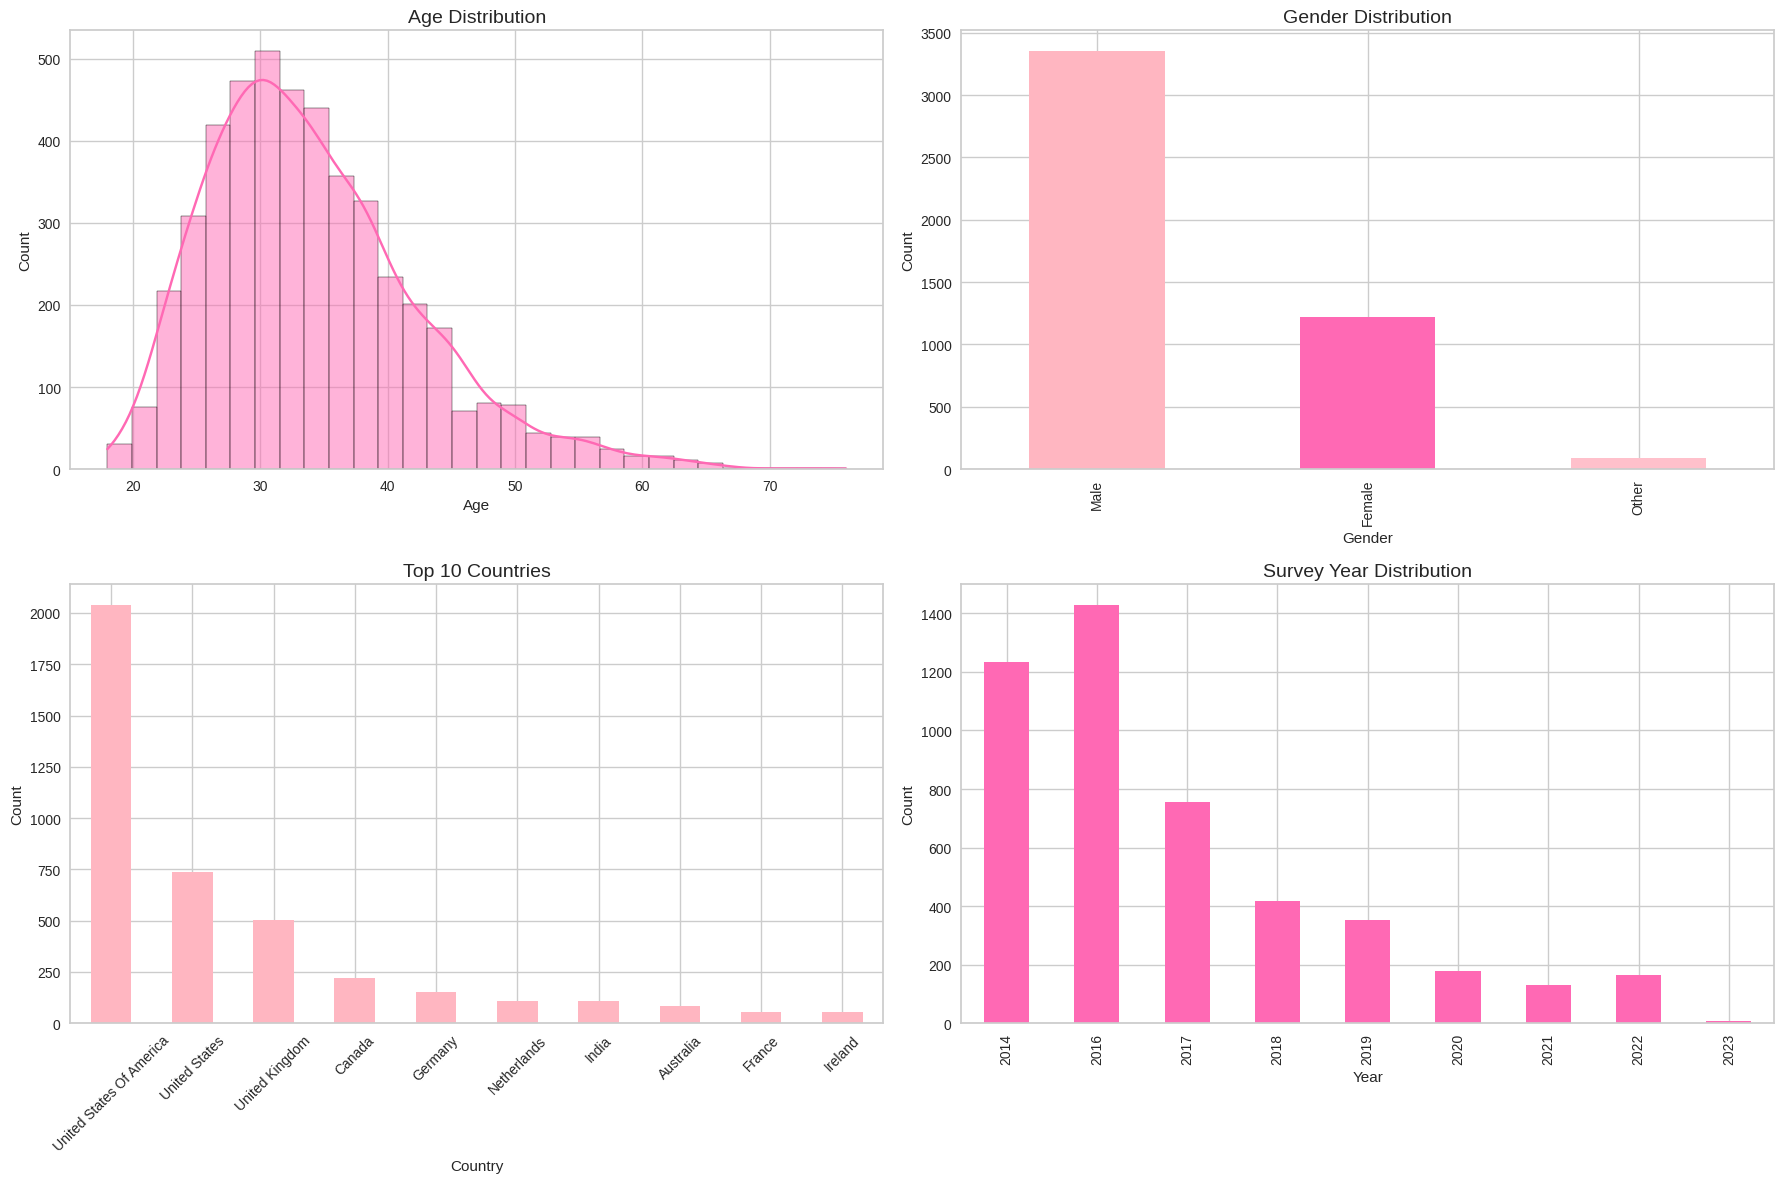

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_demographics(df):
    sns.set_palette(["#ffb6c1", "#ffc0cb", "#ff69b4", "#ff1493"])  # pink shades
    plt.figure(figsize=(18, 12))
    
    # Age distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['age'], bins=30, kde=True, color="#ff69b4")
    plt.title('Age Distribution', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Count')
    
    # Gender distribution
    plt.subplot(2, 2, 2)
    df['gender'].value_counts().plot(kind='bar', color=["#ffb6c1", "#ff69b4", "#ffc0cb"])
    plt.title('Gender Distribution', fontsize=14)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Top 10 countries
    plt.subplot(2, 2, 3)
    df['country'].value_counts().nlargest(10).plot(kind='bar', color="#ffb6c1")
    plt.title('Top 10 Countries', fontsize=14)
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Survey year distribution
    plt.subplot(2, 2, 4)
    df['survey_year'].value_counts().sort_index().plot(kind='bar', color="#ff69b4")
    plt.title('Survey Year Distribution', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_demographics(cleaned_data)


**Are you self-employed?**

In [60]:

fig = px.histogram(
    cleaned_data,
    x='self_employed',
    color='treatment_encoded',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    title="Distribution of Self-Employed Status by Treatment",
    xaxis_title="Self-Employed",
    yaxis_title="Count",
    legend_title="Treatment",
    bargap=0.2
)

fig.show()


**General insight**

- Around 10% of people are self employed. Even though there is vast difference in this, people seeking treatment are of same percentage in both categories.
- Thus whether self employed or not , does not really matter on whether the person seeks treatment or not. Insight for model building
- There is imbalance in the categories but the class distribution in each category is similar. So this might not have any effect on model

**Do you have a family history of mental illness?** 

In [61]:

fig = px.histogram(
    cleaned_data,
    x='family_history',
    color='treatment_encoded',
    barmode='group',
    title='Family History vs Treatment',
    labels={'family_history': 'Family History', 'treatment_encoded': 'Treatment'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    xaxis_title='Family History',
    yaxis_title='Count',
    bargap=0.2,
    template='plotly_white'
)

fig.show()


**General insight**

- People who have family history of mental illness are more likely to seek treatment. Around 35% of people without family history are also seeking help Insight for model building
- People with family history are more likely to seek treatment than without family history
- Family history will be a important feature

**Have you sought treatment for a mental health condition?**

In [62]:

fig = px.pie(
    cleaned_data,
    names="treatment_encoded",
    title="Proportion of the Target Variable (Treatment)",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"]   
)

fig.update_traces(
    textinfo='percent+value',
    textfont_size=14
)

fig.update_layout(
    title_x=0.5,  # Center the title
    template="plotly_white",
    legend_title="Treatment"
)

fig.show()


**General insight**
- More than 50% of people are seeking help.This is a very large portion. Studies show that Mental illness is a major risk factor for suicide , So we must ensure that every person seeking help must be treated Insight for model building
- This is our target variable
- There is no class imbalance so there is no need of resampling

In [63]:
print(cleaned_data["treatment_encoded"].value_counts())
print("Yes%", cleaned_data["treatment_encoded"].value_counts()[1] / 4659  * 100)
print("No%", cleaned_data["treatment_encoded"].value_counts()[0] / 4659  * 100)

treatment_encoded
1    2619
0    2040
Name: count, dtype: int64
Yes% 56.213779781068894
No% 43.7862202189311


- Balanced data

## Demographic Analysis vs Treatment

In [64]:

fig = px.histogram(
    cleaned_data,
    x="gender",
    color="treatment_encoded",
    barmode="group",
    title="Treatment Distribution by Gender",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"]   
)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white",
    title_x=0.5,  
    legend_title="Treatment"
)

fig.show()


In [65]:
cleaned_data['age_group'] = pd.cut(
    cleaned_data['age'],
    bins=[18, 25, 35, 45, 100],
    labels=['18-25', '26-35', '36-45', '46+']
)

fig = px.histogram(
    cleaned_data,
    x="age_group",
    color="treatment_encoded",
    barmode="group",
    title="Treatment Distribution by Age Group",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"]
)

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white",
    title_x=0.5, 
    legend_title="Treatment"
)

fig.show()


## Work Factors vs Treatment

In [66]:
fig = px.histogram(
    cleaned_data,
    x="has_benefits",
    color="treatment_encoded",
    barmode="group",
    title="Treatment Distribution by Mental Health Benefits",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"] 
)

fig.update_layout(
    xaxis_title="Company Provides Benefits?",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white",
    title_x=0.5, 
    legend_title="Treatment"
)

fig.show()


In [67]:
fig = px.histogram(
    cleaned_data,
    x="has_care_options",
    color="treatment_encoded",
    barmode="group",
    title="Treatment Distribution by Knowledge of Care Options",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"]  
)

fig.update_layout(
    xaxis_title="Knows Care Options?",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white",
    title_x=0.5, 
    legend_title="Treatment"
)

fig.show()


In [68]:
fig = px.histogram(
    cleaned_data,
    x="has_wellness_program",
    color="treatment_encoded",
    barmode="group",
    title="Treatment Distribution by Wellness Programs",
    color_discrete_sequence=["#ffb6c1", "#ff69b4"]  
)

fig.update_layout(
    xaxis_title="Company Has Wellness Program?",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white",
    title_x=0.5,  
    legend_title="Treatment"
)

fig.show()

**If you have a mental health condition, do you feel that it interferes with your work?**

<Axes: xlabel='work_interfere', ylabel='count'>

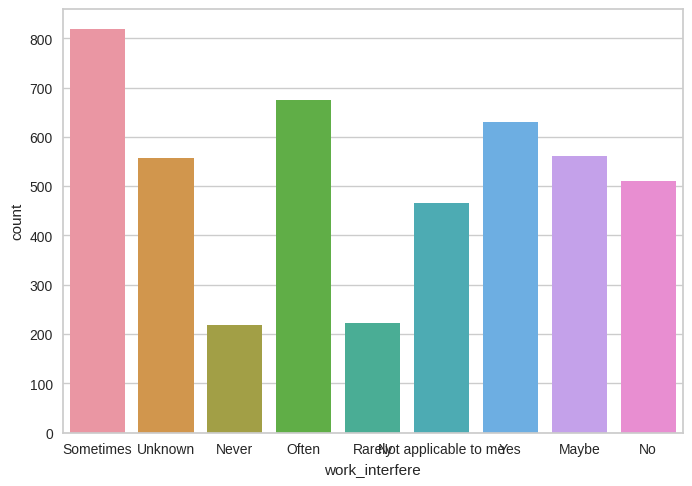

In [69]:
sns.countplot(data = cleaned_data , x = 'work_interfere')

## Psychological and Social Factors vs Treatment

**How easy is it for you to take medical leave for a mental health condition?**

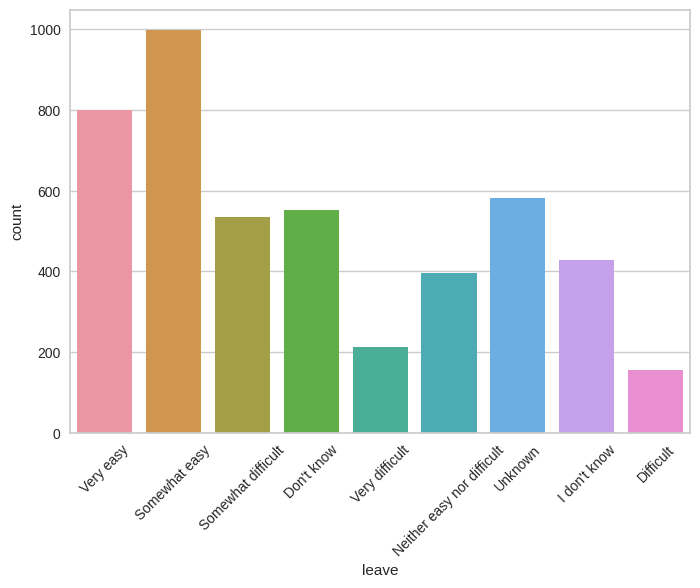

In [70]:
sns.countplot(data = cleaned_data , x = 'leave')
plt.xticks(rotation=45)
plt.show()

In [71]:
px.histogram(cleaned_data, x = 'leave',color='treatment_encoded',barmode='group')

**General Insight**

- Even though people who think it is difficult to get leave regarding mental health concerns are less but the proportion of people who seek help in this category is higher than all others.

**Do you have a family history of mental illness?**

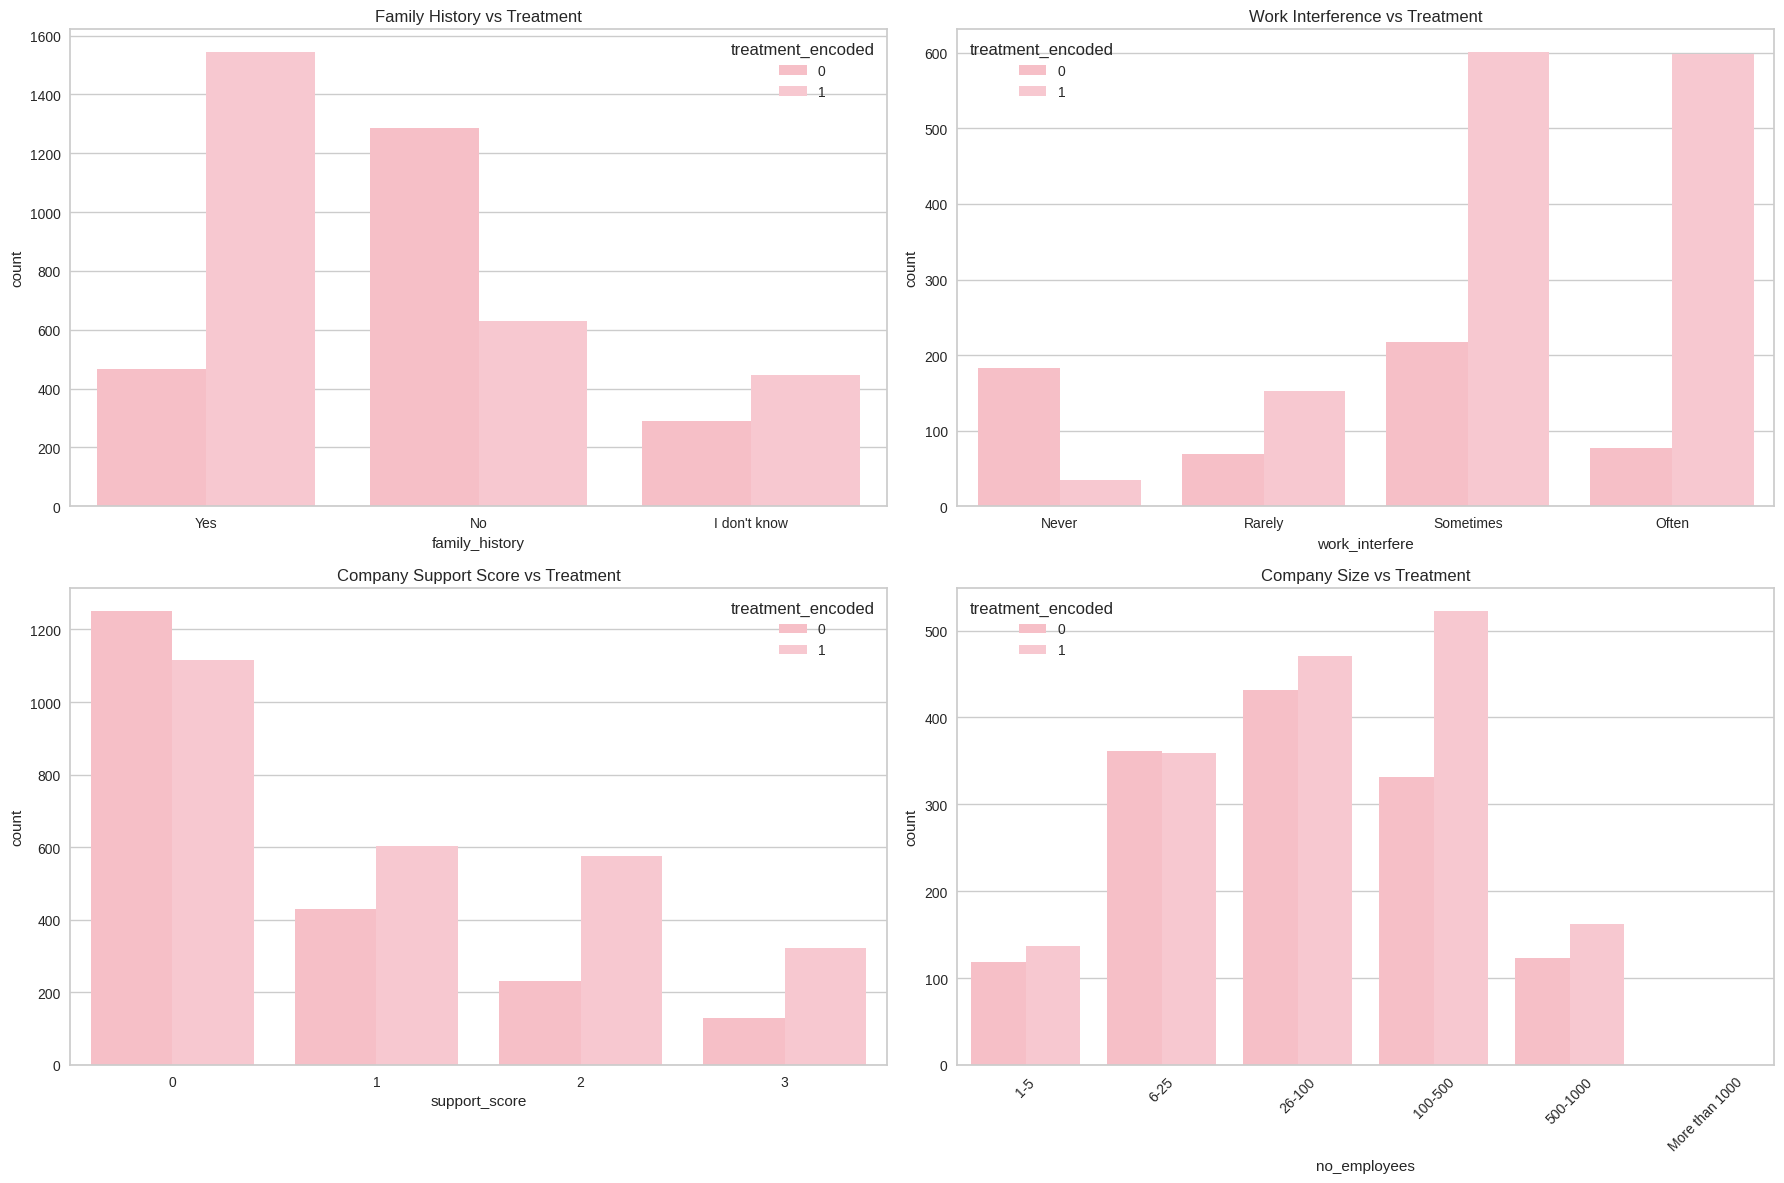

In [72]:
def plot_mental_health(df):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(2, 2, 1)
    sns.countplot(x='family_history', hue='treatment_encoded', data=df)
    plt.title('Family History vs Treatment')
    
    plt.subplot(2, 2, 2)
    order = ['Never', 'Rarely', 'Sometimes', 'Often']
    sns.countplot(x='work_interfere', hue='treatment_encoded', data=df, order=order)
    plt.title('Work Interference vs Treatment')
    
    plt.subplot(2, 2, 3)
    sns.countplot(x='support_score', hue='treatment_encoded', data=df)
    plt.title('Company Support Score vs Treatment')
    
    plt.subplot(2, 2, 4)
    emp_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
    sns.countplot(x='no_employees', hue='treatment_encoded', data=df, order=emp_order)
    plt.title('Company Size vs Treatment')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_mental_health(cleaned_data)


**General insight**

- People who have family history of mental illness are more likely to seek treatment.
- People with family history are more likely to seek treatment than without family history
- Family history will be a important feature

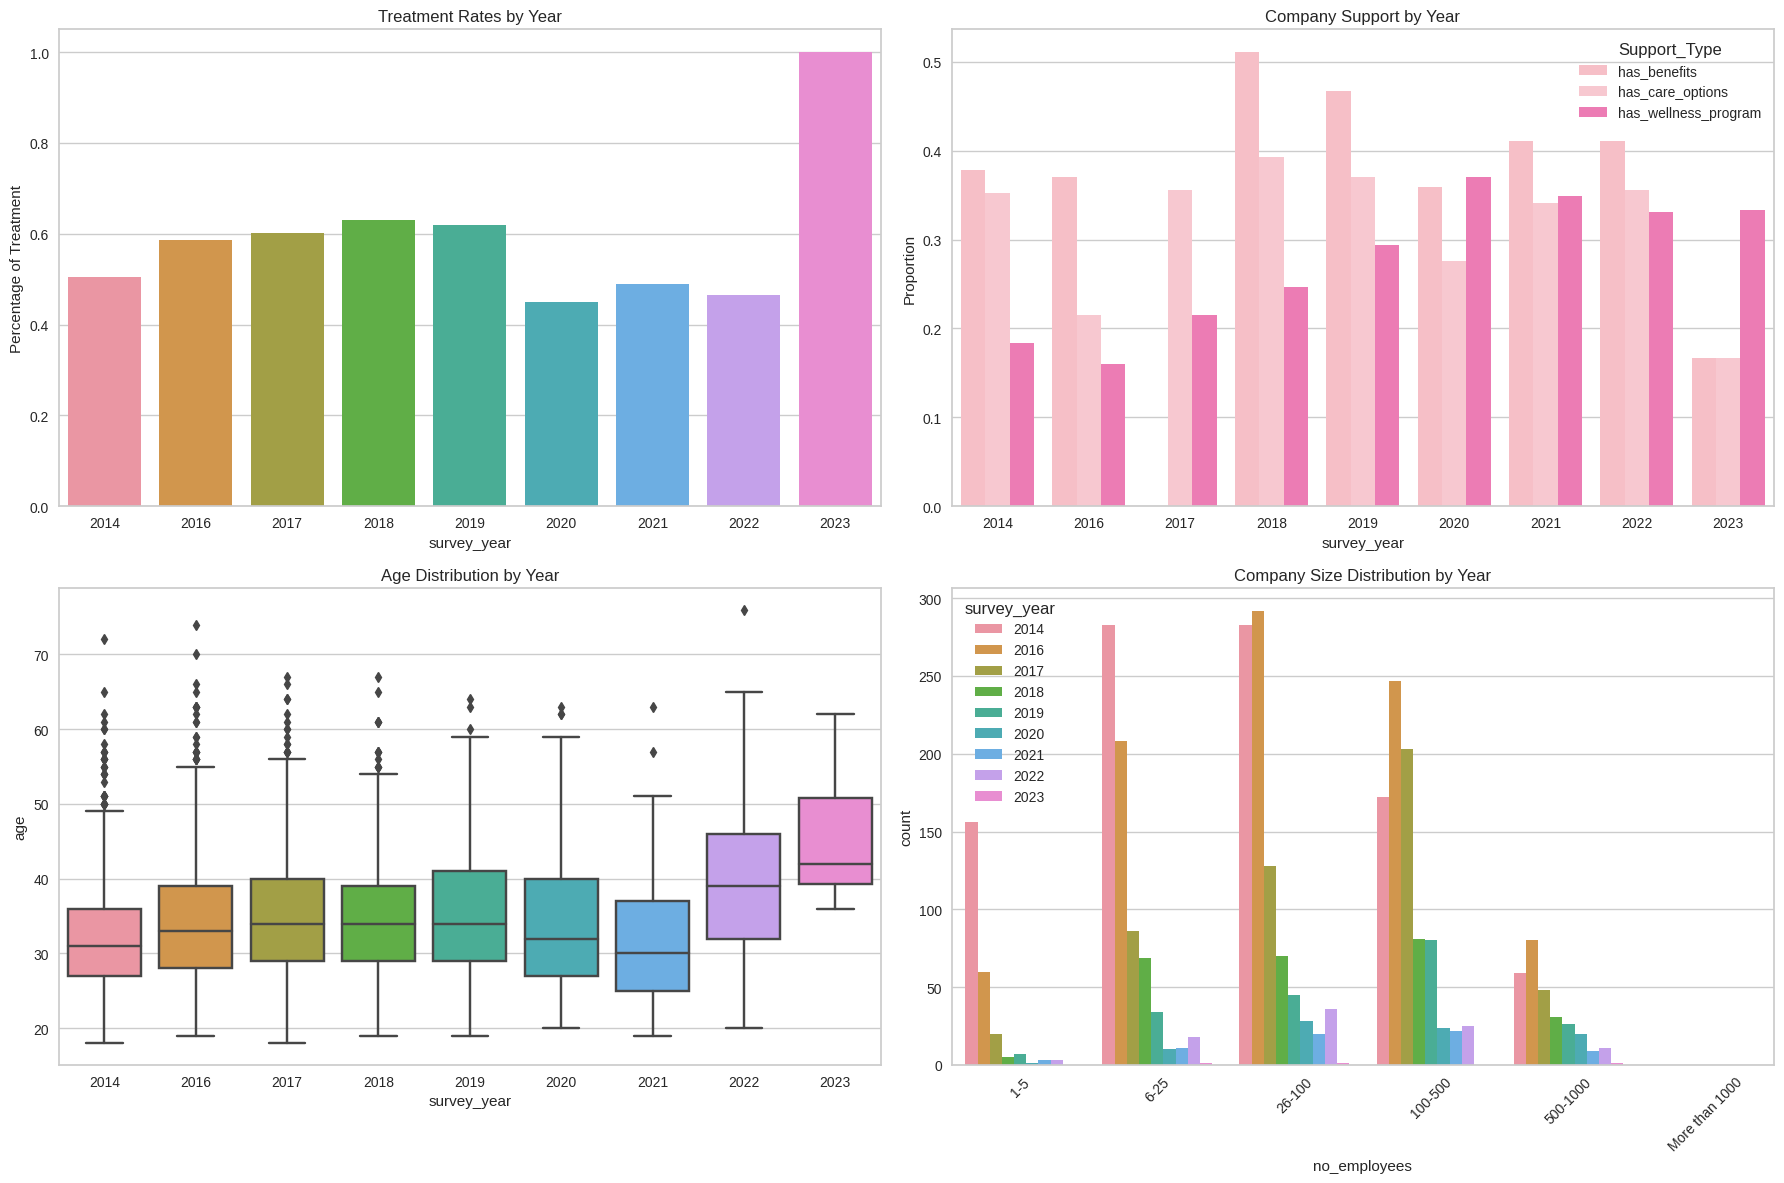

In [73]:
def plot_year_comparison(df):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(2, 2, 1)
    treatment_by_year = df.groupby('survey_year')['treatment_encoded'].mean().reset_index()
    sns.barplot(x='survey_year', y='treatment_encoded', data=treatment_by_year)
    plt.title('Treatment Rates by Year')
    plt.ylabel('Percentage of Treatment')

    plt.subplot(2, 2, 2)
    support_by_year = df.groupby('survey_year')[['has_benefits', 'has_care_options', 'has_wellness_program']].mean().reset_index()
    support_melted = support_by_year.melt(id_vars='survey_year', var_name='Support_Type', value_name='Proportion')
    sns.barplot(x='survey_year', y='Proportion', hue='Support_Type', data=support_melted)
    plt.title('Company Support by Year')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='survey_year', y='age', data=df)
    plt.title('Age Distribution by Year')

    plt.subplot(2, 2, 4)
    emp_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
    sns.countplot(x='no_employees', hue='survey_year', data=df, order=emp_order)
    plt.title('Company Size Distribution by Year')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_year_comparison(cleaned_data)


In [74]:
cleaned_data.dtypes

age                       float64
gender                     object
country                    object
self_employed              object
family_history             object
treatment                  object
work_interfere             object
no_employees               object
tech_company               object
benefits                   object
care_options               object
wellness_program           object
seek_help                  object
anonymity                  object
leave                      object
survey_year                 int64
age_group                category
self_employed_encoded       int64
tech_company_encoded        int64
has_benefits                int64
has_care_options            int64
has_wellness_program        int64
support_score               int64
treatment_encoded           int64
dtype: object

In [75]:
feature_cols = ['gender','country','self_employed' ,'family_history' ,'treatment' ,
                'work_interfere','no_employees','tech_company','benefits' ,'care_options',
                'wellness_program','seek_help' ,'anonymity','leave' ,'age_group']


cleaned_data[feature_cols] = cleaned_data[feature_cols].astype(str)



In [76]:
column_transformer = ColumnTransformer(
    transformers=[
        ('labelencoder', OrdinalEncoder(), feature_cols)
    ]
)

study_df_corr = cleaned_data.copy()
study_df_corr[feature_cols] = column_transformer.fit_transform(cleaned_data[feature_cols])


- For the correlation matrix, categorical values are encoded using OrdinalEncoder

In [77]:
fig = px.imshow(
    study_df_corr.corr(),
    text_auto='.2f',
    title='Variable Correlation Matrix',
    aspect='auto'
)

fig.update_layout(width=1000, height=1000)
fig.show(renderer='iframe')

## Feature Engineering

We engineered features to enhance the predictive power of the dataset, including:
- Encoding categorical variables using LabelEncoder and OrdinalEncoder



In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

cluster_cols = [
    'age', 'gender', 'family_history', 'treatment',
    'no_employees', 'work_interfere',
    'has_benefits', 'has_care_options', 'has_wellness_program',
    'support_score'
]

cluster_data = cleaned_data[cluster_cols].copy()


In [79]:
label_cols = ['gender', 'family_history', 'treatment', 'no_employees', 'work_interfere']

for col in label_cols:
    cluster_data[col] = LabelEncoder().fit_transform(cluster_data[col].astype(str))


In [80]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


## Dimensionality Reduction

To improve model efficiency and visualization, we used:
- **RFE (Recursive Feature Elimination)**: To select the most relevant features
- **PCA (Principal Component Analysis)**: To reduce feature space for modeling
- **t-SNE**: For 2D visualization of clusters within mental health data

In [81]:
pca = PCA(n_components=5, random_state=42)
pca_data = pca.fit_transform(scaled_data)


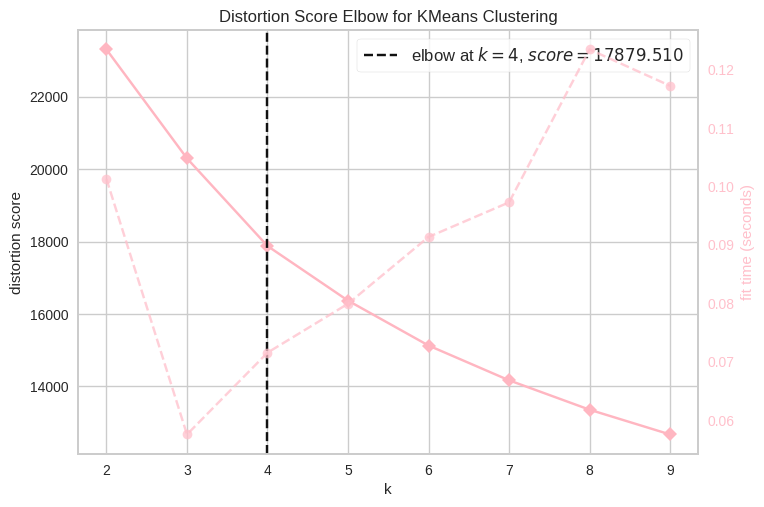

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(pca_data)
visualizer.show()


In [83]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_data)

cleaned_data['cluster'] = clusters


In [84]:
score = silhouette_score(pca_data, clusters)
print(f" Silhouette Score: {score:.3f}")


 Silhouette Score: 0.208


In [85]:
def analyze_clusters(df):
    cluster_profiles = []
    for i in range(df['cluster'].nunique()):
        group = df[df['cluster'] == i]
        profile = {
            'Cluster': i,
            'Size': len(group),
            'Treatment Rate': group['treatment_encoded'].mean(),
            'Average Age': group['age'].mean(),
            'Family History Rate': (group['family_history'] == 'Yes').mean(),
            'Support Score Avg': group['support_score'].mean(),
            'Male %': (group['gender'] == 'Male').mean(),
            'Female %': (group['gender'] == 'Female').mean(),
            'Other %': (group['gender'] == 'Other').mean()
        }
        cluster_profiles.append(profile)
    
    return pd.DataFrame(cluster_profiles)

cluster_summary = analyze_clusters(cleaned_data)
display(cluster_summary)


,Cluster,Size,Treatment Rate,Average Age,Family History Rate,Support Score Avg,Male %,Female %,Other %
0,0,1031,0.626576,30.716780,0.542192,0.420951,0.764306,0.214355,0.021339
1,1,1076,0.541822,37.912639,0.388476,0.172862,0.754647,0.230483,0.014870
2,2,1259,0.714853,34.871326,0.528197,2.357427,0.646545,0.330421,0.023034
3,3,1293,0.378964,32.643465,0.284609,0.320186,0.724671,0.257541,0.017788


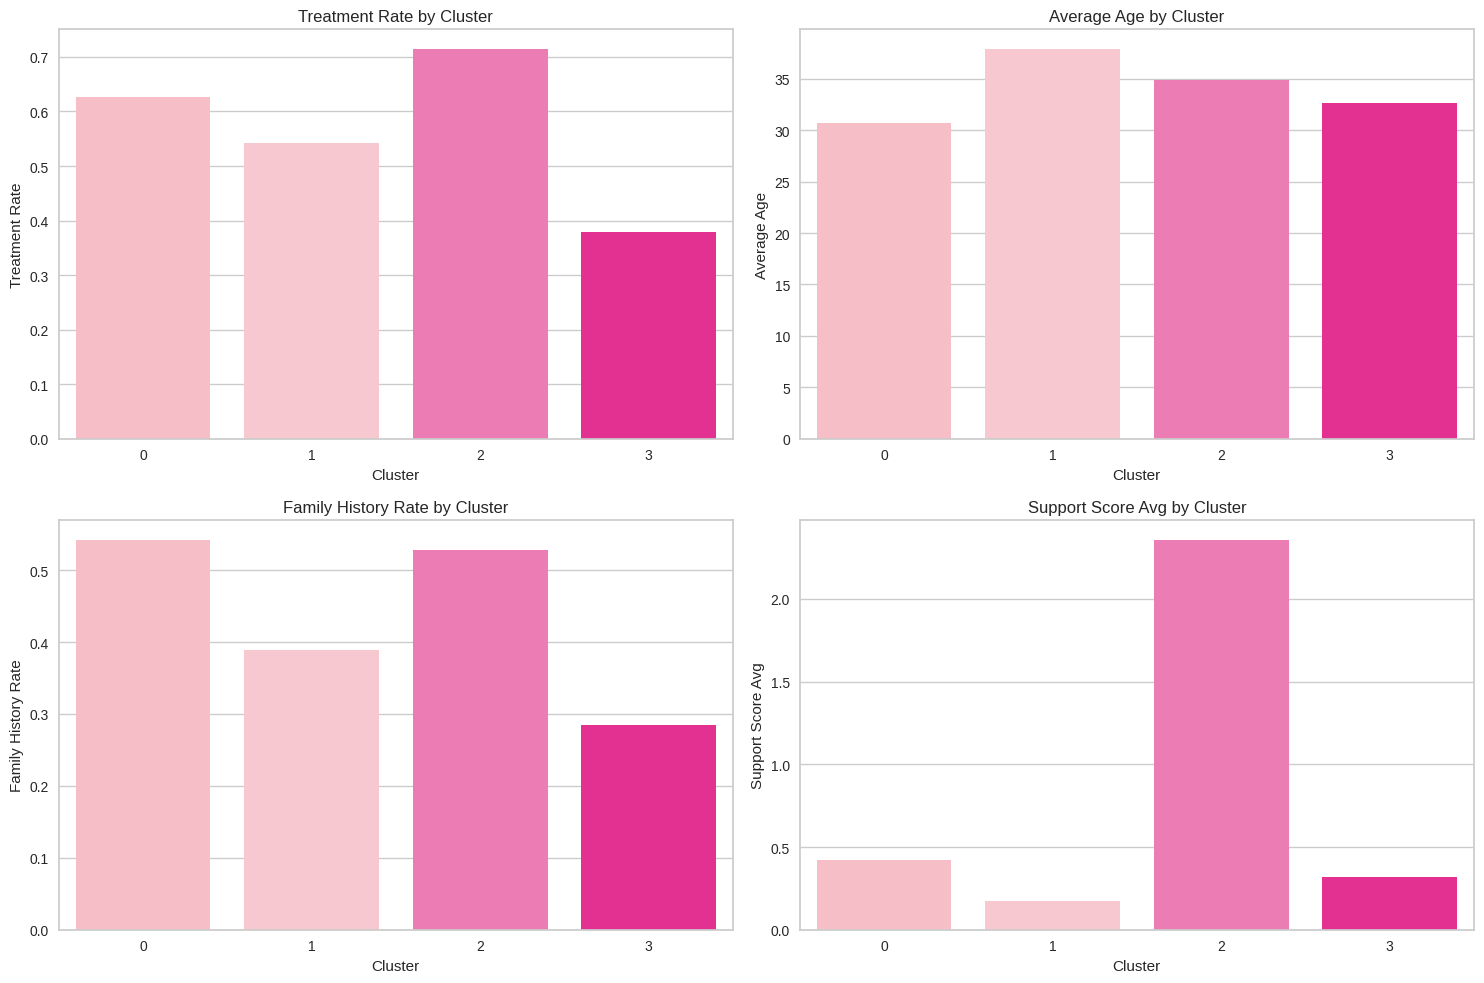

In [86]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Treatment Rate', 'Average Age', 'Family History Rate', 'Support Score Avg']):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Cluster', y=col, data=cluster_summary)
    plt.title(f'{col} by Cluster')

plt.tight_layout()
plt.show()


In [87]:
from sklearn.decomposition import PCA
import plotly.express as px


pca = PCA(n_components=3)
pca_data = pca.fit_transform(cluster_data)

cluster_3d = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
cluster_3d['cluster'] = cleaned_data['cluster']

fig = px.scatter_3d(cluster_3d, x='PC1', y='PC2', z='PC3',
                    color='cluster', opacity=0.7,
                    title='3D Cluster Visualization using PCA')
fig.show()


## Model Training & Evaluation

We applied multiple machine learning models to predict whether a person is likely to seek treatment. Models used:
- **Logistic Regression**: As a baseline
- **Random Forest**: For interpretability and non-linearity
- **XGBoost & LightGBM**: For gradient boosting and high accuracy
- **CatBoost**: For better handling of categorical data

Each model was evaluated using:
- Accuracy
- F1 Score
- ROC AUC Score

We also used GridSearchCV for hyperparameter tuning and ensured balanced class weights where needed.



 Logistic Regression
              precision    recall  f1-score   support

           0      0.662     0.547     0.599       419
           1      0.676     0.772     0.721       513

    accuracy                          0.671       932
   macro avg      0.669     0.659     0.660       932
weighted avg      0.670     0.671     0.666       932

ROC AUC: 0.712

 Random Forest
              precision    recall  f1-score   support

           0      0.711     0.683     0.697       419
           1      0.749     0.774     0.761       513

    accuracy                          0.733       932
   macro avg      0.730     0.728     0.729       932
weighted avg      0.732     0.733     0.732       932

ROC AUC: 0.820

 XGBoost
              precision    recall  f1-score   support

           0      0.733     0.687     0.709       419
           1      0.757     0.795     0.776       513

    accuracy                          0.747       932
   macro avg      0.745     0.741     0.743       

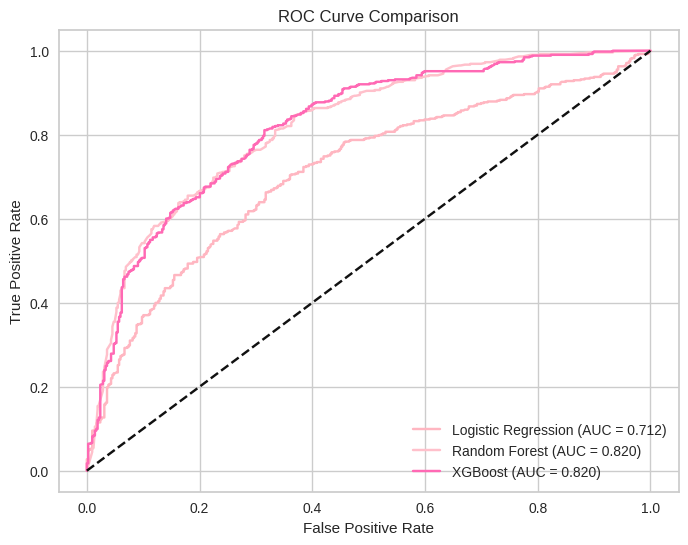

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

features = ['age', 'gender', 'family_history', 'no_employees', 'work_interfere',
            'has_benefits', 'has_care_options', 'has_wellness_program', 'support_score']

X = cleaned_data[features].copy()
y = cleaned_data['treatment_encoded']

cat_cols = ['gender', 'family_history', 'no_employees', 'work_interfere']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n {name}")
    print(classification_report(y_test, y_pred, digits=3))
    
    roc_auc = roc_auc_score(y_test, y_prob)
    results[name] = {'roc_auc': roc_auc, 'model': model}
    print(f"ROC AUC: {roc_auc:.3f}")

# --- 5. ROC Curve ---
plt.figure(figsize=(8,6))
for name, result in results.items():
    y_prob = result['model'].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()



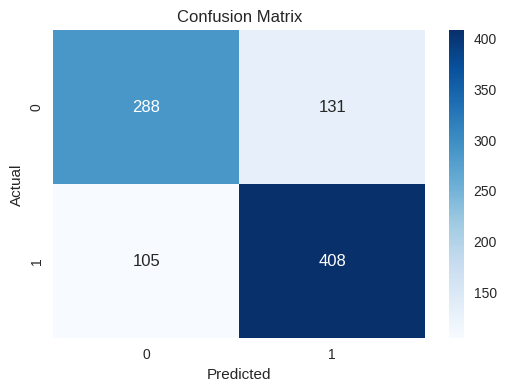

In [89]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


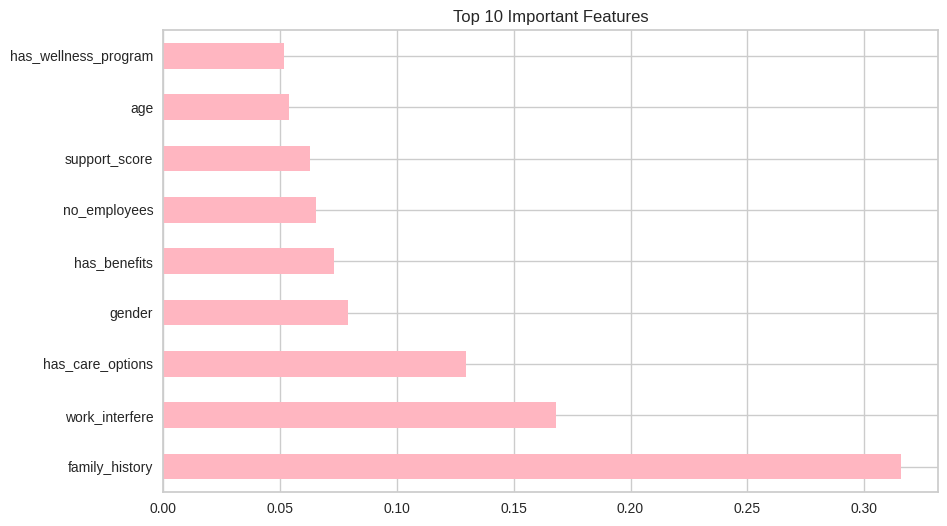

In [90]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [91]:
import plotly.express as px

treatment_by_country = cleaned_data.groupby('country')['treatment_encoded'].mean().reset_index()

fig = px.choropleth(treatment_by_country, 
                    locations='country',
                    locationmode='country names',
                    color='treatment_encoded',
                    title='معدل طلب العلاج النفسي حسب الدولة',
                    color_continuous_scale='Viridis')
fig.show()


In [92]:
cleaned_data.to_csv('mental_health.csv', index=False)
cluster_summary.to_csv("cluster_summary.csv", index=False)

## Summary, Insights & Recommendations

### Key Findings:
- The majority of tech employees feel that mental health is not well supported in their workplace.
- There's a notable increase in mental health awareness after 2020.
- Treatment rates are higher in countries with stronger healthcare systems and policies.

### Recommendations:
- Companies should implement clearer mental health policies and provide anonymous help options.
- Wellness programs and care options should be actively promoted internally.
- Normalize mental health conversations to reduce stigma in the tech industry.

### Limitations:
- Survey data is self-reported and may contain bias.
- Country-wise representation is uneven (e.g., US dominates).
- No deep clinical or diagnostic details included.

### Future Work:
- Combine this with social media mental health sentiment analysis.
- Apply NLP to open-ended survey questions.
- Study post-pandemic (2023+) trends in-depth.
